In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tqdm

In [2]:
def get_aggregate_df(filepath):
    df = pd.read_csv(filepath, index_col='Timestamp')
    df.index = df.index.astype('datetime64[ns]')
    df = df.resample('H').mean()
    df = df.fillna(df.mean())
    return df

df_Moufia = get_aggregate_df('Moufia_2014_2015/moufia_2014_2015.csv')
df_Possession = get_aggregate_df('Possession_2014_2015/possession_2014_2015.csv')
df_SaintAndre = get_aggregate_df('SaintAndre_2014_205/saintandre_2014_2015.csv')
df_SaintLeu = get_aggregate_df('SaintLeu_2014_2015/saintleu_2014_2015.csv')
df_SaintPierre = get_aggregate_df('SaintPierre_2014_2015/saintpierre_2014_2015.csv')

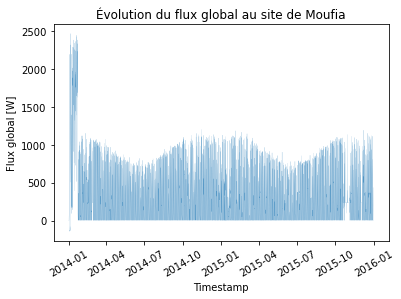

In [3]:
plt.plot(df_Moufia.index, df_Moufia.FG_Avg, linewidth=0.1)
plt.xticks(rotation=30)
plt.ylabel('Flux global [W]')
plt.xlabel('Timestamp')
plt.title('Évolution du flux global au site de Moufia')
plt.show()
df_Moufia = df_Moufia['2014-01-25':]

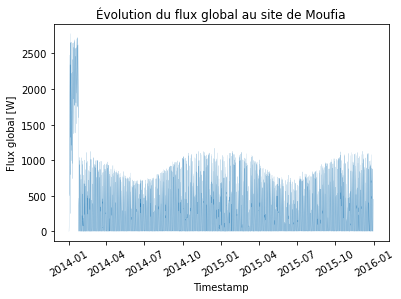

In [4]:
plt.plot(df_SaintAndre.index, df_SaintAndre.FG_Avg, linewidth=0.1)
plt.xticks(rotation=30)
plt.ylabel('Flux global [W]')
plt.xlabel('Timestamp')
plt.title('Évolution du flux global au site de Moufia')
plt.show()
df_SaintAndre = df_SaintAndre['2014-01-25':]

Text(0.5, 1.0, 'Matrice de corrélation - Moufia')

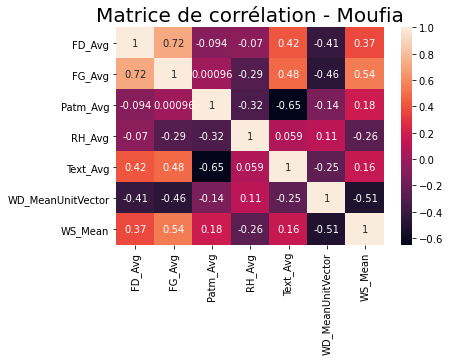

In [5]:
sns.heatmap(df_Moufia.corr(), annot=True).set_title('Matrice de corrélation - Moufia', size=20)

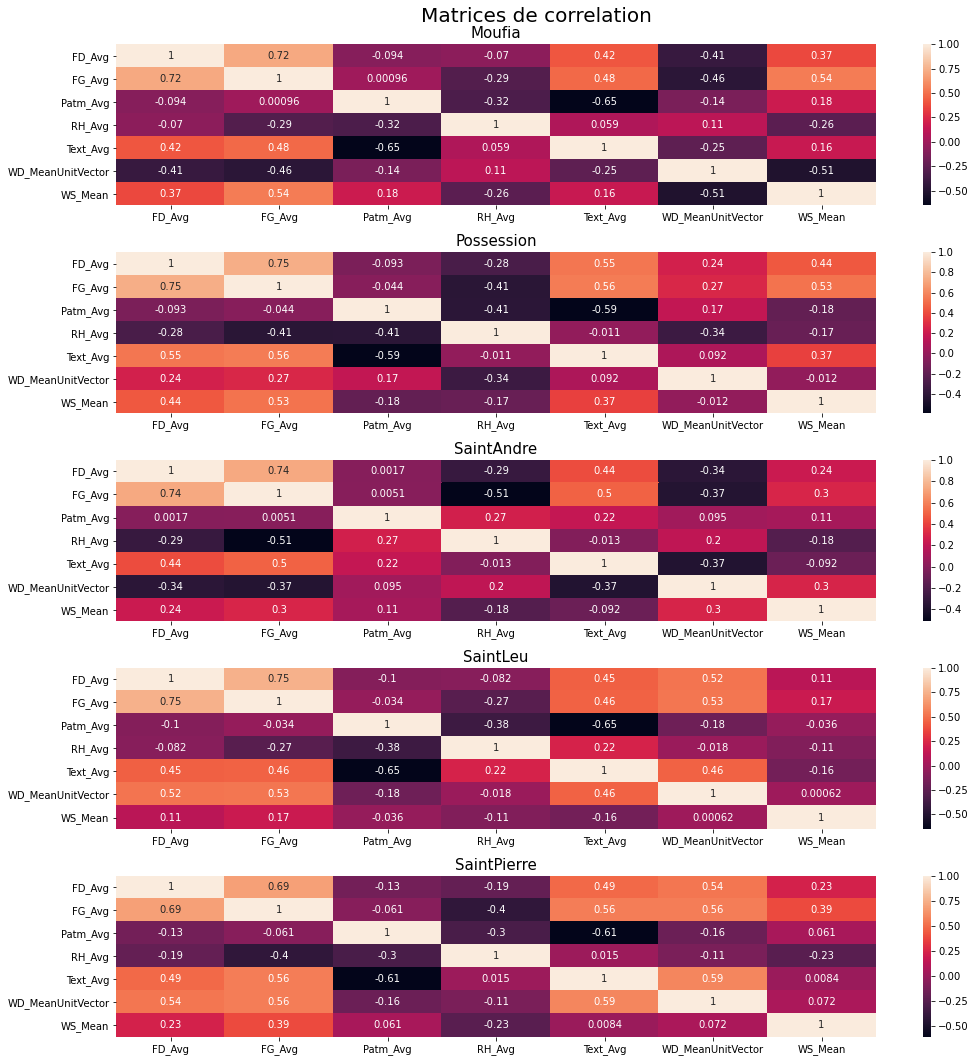

In [6]:
fig = plt.figure(figsize=(15,15))
fig.suptitle('Matrices de correlation', size=20)
fig.add_subplot(5,1,1)
sns.heatmap(df_Moufia.corr(), annot=True).set_title('Moufia', size=15)
fig.add_subplot(5,1,2)
sns.heatmap(df_Possession.corr(), annot=True).set_title('Possession', size=15)
fig.add_subplot(5,1,3)
sns.heatmap(df_SaintAndre.corr(), annot=True).set_title('SaintAndre', size=15)
fig.add_subplot(5,1,4)
sns.heatmap(df_SaintLeu.corr(), annot=True).set_title('SaintLeu', size=15)
fig.add_subplot(5,1,5)
sns.heatmap(df_SaintPierre.corr(), annot=True).set_title('SaintPierre', size=15)
plt.tight_layout()

In [7]:
def get_best_rolling_df(df, name):
    for col in tqdm.tqdm([col for col in df.columns if col!='FG_Avg'], desc=name):
        corr_max = df.FG_Avg.corr(df[col])
        window_max = 0
        for window in range(1, 24*10):
            corr = df.FG_Avg.corr(df[col].rolling(window=window, min_periods=1, center=True).mean())
            corr_max, window_max = (corr_max, window_max) if (abs(corr)<=abs(corr_max)) else (corr, window)
        if abs(corr_max) < 0.1:
            df = df.drop([col], axis=1)
        elif window_max != 0:
            df[col] = df[col].rolling(window=window_max, min_periods=1, center=True).mean()
    return df

df_Moufia = get_best_rolling_df(df_Moufia, 'df_Moufia')
df_Possession = get_best_rolling_df(df_Possession, 'df_Possession')
df_SaintAndre = get_best_rolling_df(df_SaintAndre, 'df_SaintAndre')
df_SaintLeu = get_best_rolling_df(df_SaintLeu, 'df_SaintLeu')
df_SaintPierre = get_best_rolling_df(df_SaintPierre, 'df_SaintPierre')

df_SaintPierre: 100%|████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.88it/s]


Text(0.5, 1.0, 'Matrice de corrélation après moyenne glissante - Moufia')

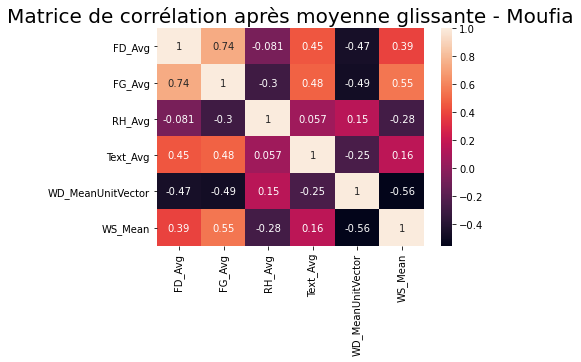

In [8]:
sns.heatmap(df_Moufia.corr(), annot=True).set_title('Matrice de corrélation après moyenne glissante - Moufia', size=20)

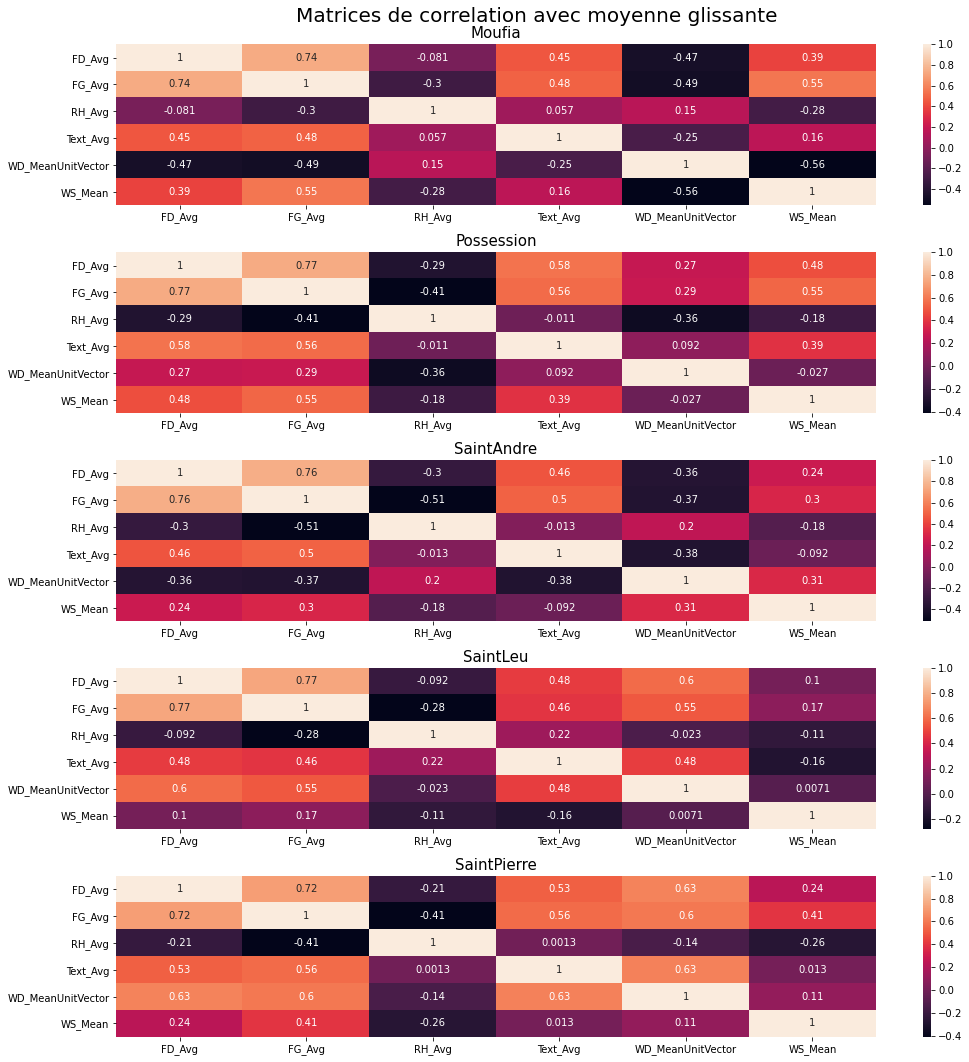

In [9]:
fig = plt.figure(figsize=(15,15))
fig.suptitle('Matrices de correlation avec moyenne glissante', size=20)
fig.add_subplot(5,1,1)
sns.heatmap(df_Moufia.corr(), annot=True).set_title('Moufia', size=15)
fig.add_subplot(5,1,2)
sns.heatmap(df_Possession.corr(), annot=True).set_title('Possession', size=15)
fig.add_subplot(5,1,3)
sns.heatmap(df_SaintAndre.corr(), annot=True).set_title('SaintAndre', size=15)
fig.add_subplot(5,1,4)
sns.heatmap(df_SaintLeu.corr(), annot=True).set_title('SaintLeu', size=15)
fig.add_subplot(5,1,5)
sns.heatmap(df_SaintPierre.corr(), annot=True).set_title('SaintPierre', size=15)
plt.tight_layout()

In [10]:
df_Moufia.to_csv('Moufia_2014_2015/moufia_2014_2015_treated.csv')
df_Possession.to_csv('Possession_2014_2015/possession_2014_2015_treated.csv')
df_SaintAndre.to_csv('SaintAndre_2014_205/saintandre_2014_2015_treated.csv')
df_SaintLeu.to_csv('SaintLeu_2014_2015/saintleu_2014_2015_treated.csv')
df_SaintPierre.to_csv('SaintPierre_2014_2015/saintpierre_2014_2015_treated.csv')